In [2]:
import json
import re

from konlpy.tag import Okt

from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [3]:
inputFileName = '1호선_naver_news'
data = json.loads(open(inputFileName+'.json','r',encoding='utf-8').read())
data #출력하여 내용 확인

[{'cnt': 1,
  'description': '달성군 후보지는 화원읍 설화리 563번지 일원에 위치하며 중부내륙고속도로, 대구도시철도 <b>1호선</b> 설화명곡역, 2027년 개통 예정인 대구산업선철도 서대구역 등이 인접해 있는 곳이다. 아울러 종합병원이 없어... ',
  'link': 'http://www.hidomin.com/news/articleView.html?idxno=499257',
  'org_link': 'http://www.hidomin.com/news/articleView.html?idxno=499257',
  'pDate': '2022-11-15 18:44:00',
  'title': '달성군, 국립경찰병원 분원 건립 후보지 1차 관문 통과'},
 {'cnt': 2,
  'description': '북부 순환망은 인천<b>1호선</b>~인천2호선~서울7호선을 통해 환승이 가능한 순환망을 형성해 철도로 연결되는 도시를 만든다는 구상이다. 인천<b>1호선</b>은 서구 대곡동 지역으로 연장해 김포도시철도와 환승하는 방안을... ',
  'link': 'http://www.incheonilbo.com/news/articleView.html?idxno=1169874',
  'org_link': 'http://www.incheonilbo.com/news/articleView.html?idxno=1169874',
  'pDate': '2022-11-15 18:38:00',
  'title': '[인천 북부 종합발전계획 발표] &quot;인천 북부, 살고 싶은 &apos;교통·환경·첨단산업...'},
 {'cnt': 3,
  'description': '단지 가까이에 서울지하철 <b>1호선</b> 동인천역과 도원역을 이용할 수 있고, 인천대로, 경인고속도로, 수도권제2외곽순환고속도로 등 광역교통망으로의 접근성이 좋아 인천 지역뿐만 아니라 서울•수도권 지역으로의... ',
  'link': 'http://www.getnews.co.kr/news

In [4]:
description = ''
for item in data:
    if 'description' in item.keys():
        description = description + re.sub(r"[^\w]",' ',item['description'])
description[:100]

'달성군 후보지는 화원읍 설화리 563번지 일원에 위치하며 중부내륙고속도로  대구도시철도  b 1호선  b  설화명곡역  2027년 개통 예정인 대구산업선철도 서대구역 등이 인접해 '

#### 품사 태깅 : 명사(noun)추출

In [5]:
nlp = Okt()
message_N = nlp.nouns(description)
message_N[:10]

['달성군', '후보', '화원읍', '설화', '리', '번지', '일원', '위치', '중부내륙', '고속도로']

In [6]:
count = Counter(message_N)
count

Counter({'달성군': 19,
         '후보': 16,
         '화원읍': 3,
         '설화': 38,
         '리': 7,
         '번지': 3,
         '일원': 15,
         '위치': 80,
         '중부내륙': 17,
         '고속도로': 150,
         '대구': 107,
         '도시철도': 250,
         '호선': 1841,
         '명곡': 34,
         '역': 180,
         '개통': 125,
         '예정': 219,
         '산업': 41,
         '선철': 17,
         '서대구역': 12,
         '등': 295,
         '인접': 50,
         '곳': 38,
         '종합병원': 9,
         '북부': 58,
         '순환': 93,
         '망은': 36,
         '인천': 387,
         '서울': 399,
         '통해': 66,
         '환승': 95,
         '망': 73,
         '형성': 24,
         '철도': 53,
         '연결': 49,
         '도시': 64,
         '구상': 19,
         '은': 74,
         '서구': 52,
         '대곡동': 36,
         '지역': 108,
         '연장': 94,
         '김포': 39,
         '방안': 28,
         '단지': 166,
         '가까이': 20,
         '지하철': 607,
         '동인천역': 7,
         '도원역': 2,
         '이용': 158,
         '수': 140,
         '

In [8]:
word_count = dict()

for tag, counts in count.most_common(80):
    if(len(str(tag)) > 1):
        word_count[tag] = counts

In [9]:
font_path = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family=font_name)

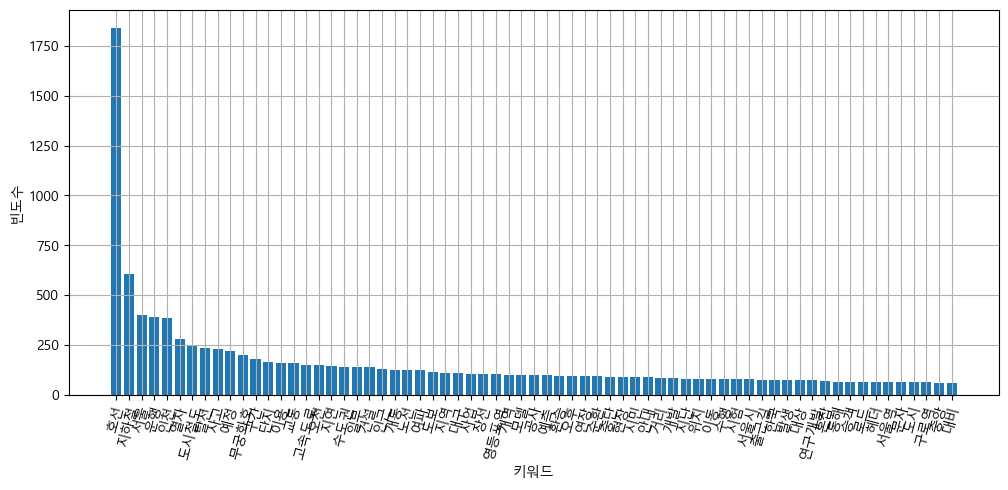

In [10]:
plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='75')

plt.show()

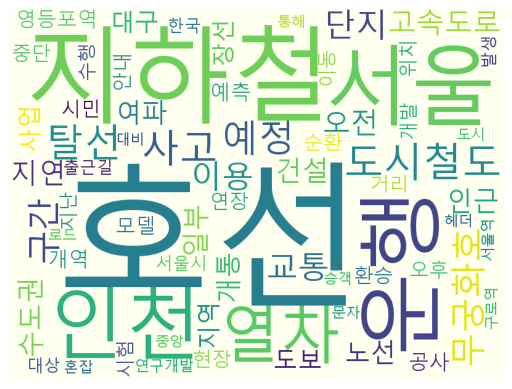

In [11]:
wc = WordCloud(font_path, background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)

plt.imshow(cloud)
plt.axis('off')
plt.show()